# Airline Dataset...

In [1]:
# Import Requeierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\Airline Dataset Updated - v2.csv")

# Display basic information

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [4]:
print(df.head())

  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   

In [5]:
# Check for missing values
print(df.isnull().sum())

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


In [6]:
# Convert 'Departure Date' to datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='%m/%d/%Y', errors='coerce')


# 1. Passenger Demographics Analysis

Gender
Male      49598
Female    49021
Name: count, dtype: int64


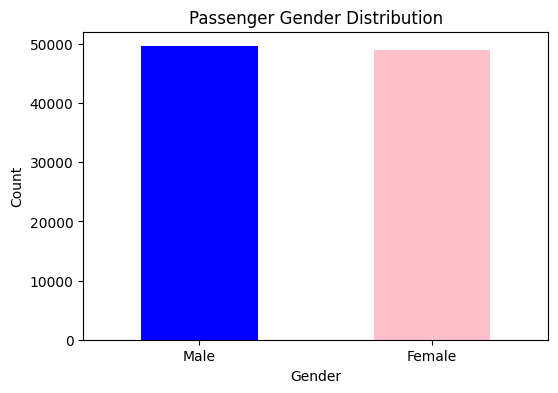

Male Travelers are most in number


In [7]:
# Gender Counts...
gender_counts = df['Gender'].value_counts()
print (gender_counts)

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title("Passenger Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

print ("Male Travelers are most in number")

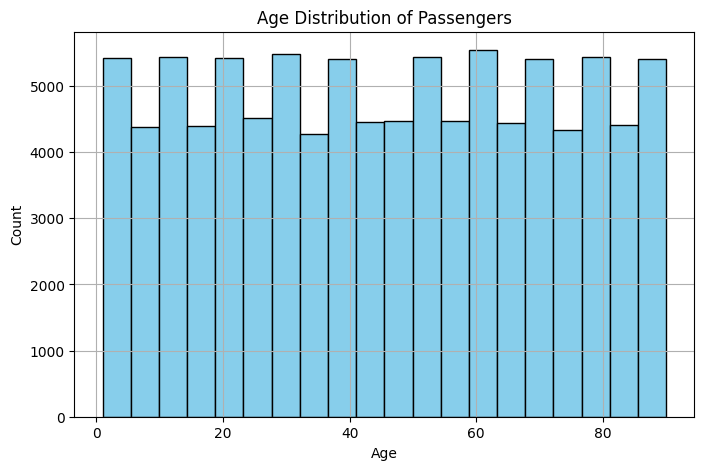

In [8]:
# Age distribution

plt.figure(figsize=(8,5))
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid()
plt.show()


Text(0.5, 1.0, 'Flight Status by Gender')

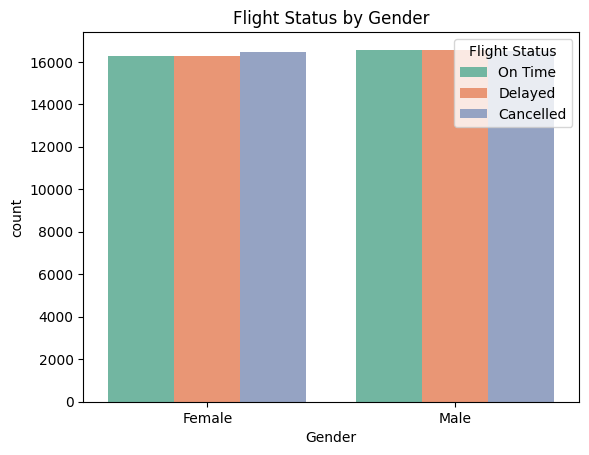

In [9]:
# Flight Status by Gendersns.countplot(data=df, x='Gender', hue='Flight Status', palette='Set2')
sns.countplot(data=df, x='Gender', hue='Flight Status', palette='Set2')
plt.title("Flight Status by Gender")

Text(0.5, 1.0, 'Age Distribution by Nationality')

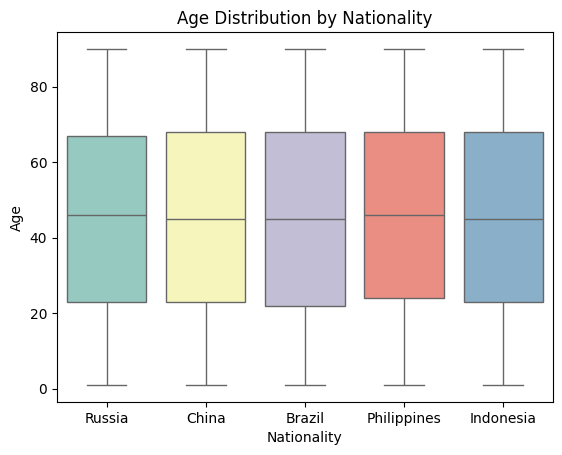

In [10]:
# 2. Age Distribution by Nationality (Top 5)
# plt.subplot(5, 3, 13)
top_nations = df['Nationality'].value_counts().nlargest(5).index
top_nation_data = df[df['Nationality'].isin(top_nations)]
sns.boxplot(data=top_nation_data, x='Nationality', y='Age', hue='Nationality', palette='Set3', legend=False)
plt.title("Age Distribution by Nationality")

# 2. Flight Status Analysis

Flight Status
Cancelled    32942
On Time      32846
Delayed      32831
Name: count, dtype: int64


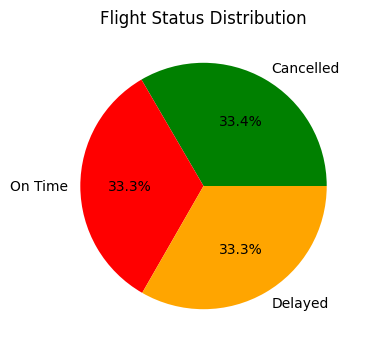

In [11]:
# Flight Status Distribution
status_counts = df['Flight Status'].value_counts()
print (status_counts)

plt.figure(figsize=(6,4))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'orange'])
plt.title("Flight Status Distribution")
plt.ylabel("")
plt.show()


## 3. Busiest Airports with Most Departures


Airport Name
San Pedro Airport       43
Santa Maria Airport     38
Böblingen Flugfeld      36
Santa Ana Airport       35
San Fernando Airport    31
Mae Hong Son Airport    29
Santa Rosa Airport      28
Capital City Airport    28
Cochrane Airport        28
Bathurst Airport        27
Name: count, dtype: int64


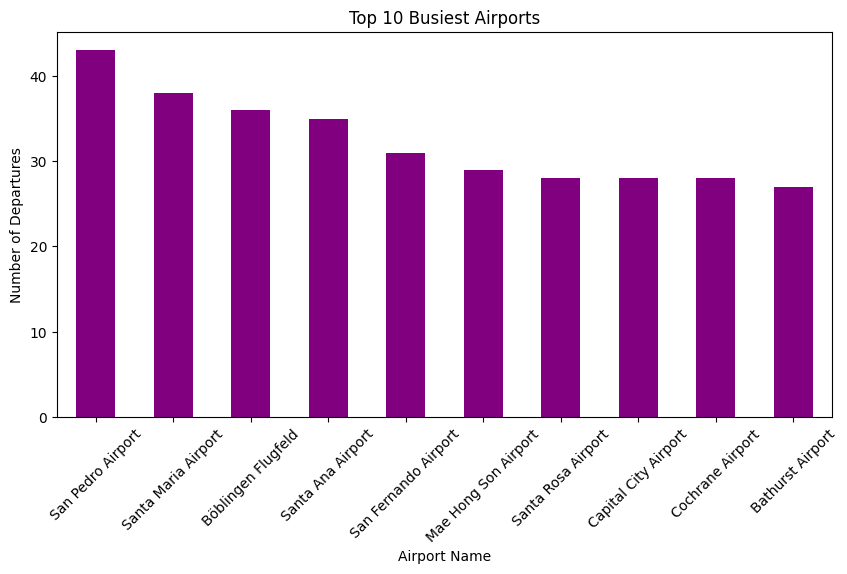

In [12]:
# Top 10 busiest Airports
top_airports = df['Airport Name'].value_counts().head(10)
print (top_airports)

plt.figure(figsize=(10,5))
top_airports.plot(kind='bar', color='purple')
plt.title("Top 10 Busiest Airports")
plt.ylabel("Number of Departures")
plt.xticks(rotation=45)
plt.show()


## 4. Flights by Continent


Airport Continent
NAM    32033
AS     18637
OC     13866
EU     12335
AF     11030
SAM    10718
Name: count, dtype: int64


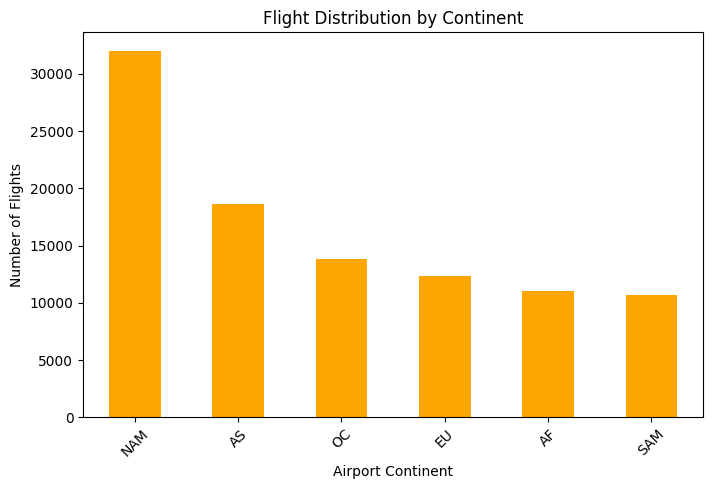

In [13]:
# Flight Distribution by Continent
continent_counts = df['Airport Continent'].value_counts()
print (continent_counts)

plt.figure(figsize=(8,5))
continent_counts.plot(kind='bar', color='orange')
plt.title("Flight Distribution by Continent")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Flight Status by Continent')

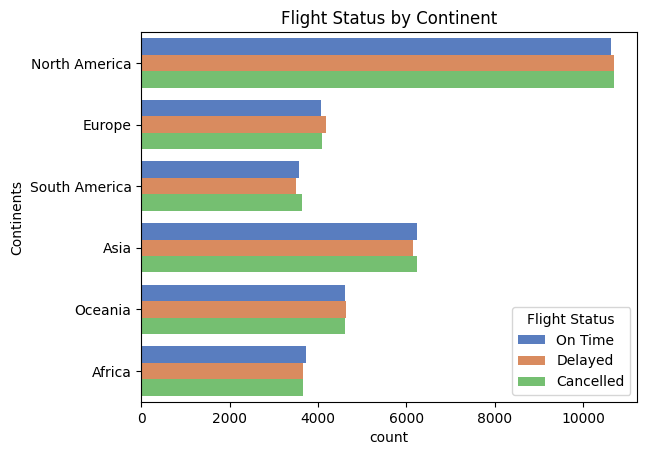

In [14]:
# Flight Status by Continent
# plt.subplot(5, 3, 8)
sns.countplot(data=df, y='Continents', hue='Flight Status', palette='muted')
plt.title("Flight Status by Continent")

### 5. Delayed vs On-Time Flight Ratio by Continent


Flight Status  Cancelled   Delayed   On Time
Continents                                  
Africa          0.331550  0.331278  0.337171
Asia            0.334550  0.330525  0.334925
Europe          0.331982  0.338711  0.329307
North America   0.333812  0.333906  0.332282
Oceania         0.333117  0.334199  0.332684
South America   0.339896  0.327393  0.332711


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'South America')])

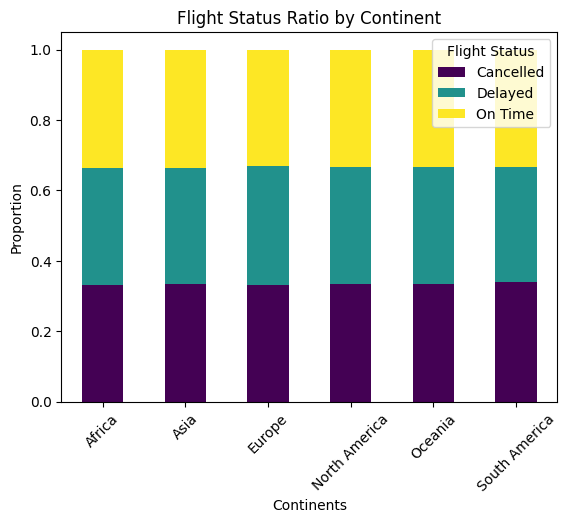

In [15]:
# Delayed vs On-Time Flight Ratio by Continent
# plt.subplot(5, 3, 12)
status_ratio = df.groupby('Continents')['Flight Status'].value_counts(normalize=True).unstack()
print (status_ratio)

status_ratio.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title("Flight Status Ratio by Continent")
plt.xlabel("Continents")
plt.ylabel("Proportion")
plt.xticks(rotation=45)


## 6. Monthly Flight Trends (Number of Flights in a month )

Month
1.0     5217
2.0     4398
3.0     5195
4.0     4729
5.0     5183
6.0     4872
7.0     5167
8.0     5233
9.0     4897
10.0    5223
11.0    4812
12.0    4732
Name: Passenger ID, dtype: int64


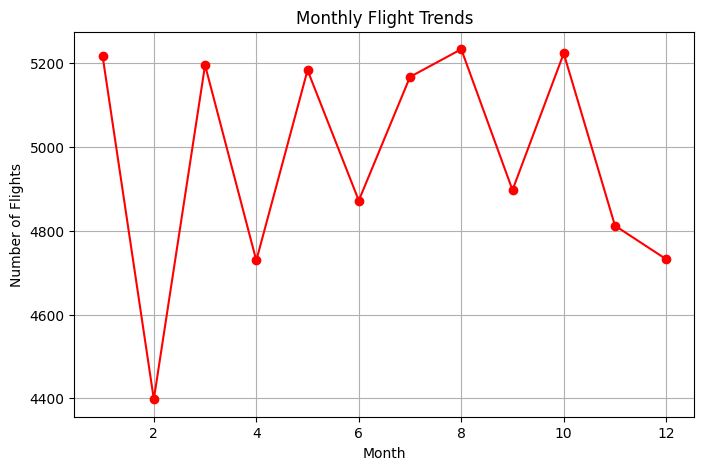

In [16]:
# Number of Flights
df['Month'] = df['Departure Date'].dt.month
monthly_flights = df.groupby('Month')['Passenger ID'].count()
print (monthly_flights)

plt.figure(figsize=(8,5))
monthly_flights.plot(kind='line', marker='o', color='red')
plt.title("Monthly Flight Trends")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.grid()
plt.show()


## 7. Monthly Flight Delay Trends Over Time

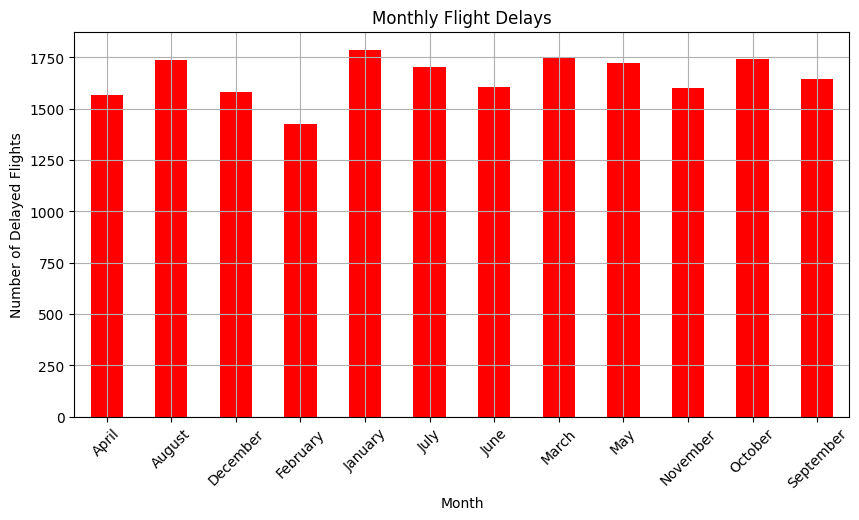

In [17]:
# Flight Delay Trends Over Time
# Extracting month from departure date
df['Month'] = df['Departure Date'].dt.month_name()

# Counting delayed flights per month
monthly_delays = df[df['Flight Status'] == 'Delayed'].groupby('Month').size()

# Plot
plt.figure(figsize=(10, 5))
monthly_delays.plot(kind='bar', color='red')
plt.title("Monthly Flight Delays")
plt.xlabel("Month")
plt.ylabel("Number of Delayed Flights")
plt.xticks(rotation=45)
plt.grid()

plt.show()

## 8. Flight Status..

Flight Status
Cancelled    32942
On Time      32846
Delayed      32831
Name: count, dtype: int64


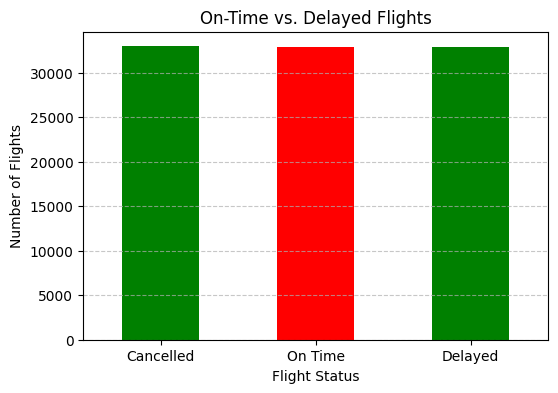

In [18]:
# Count the number of flights by status
flight_status_counts = df['Flight Status'].value_counts()
print (flight_status_counts)

# Plot the bar chart
plt.figure(figsize=(6,4))
flight_status_counts.plot(kind='bar', color=['green', 'red'])  # Customize colors
plt.title("On-Time vs. Delayed Flights")
plt.xlabel("Flight Status")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### 9. Pilot Performance Analysis (Who operates the most delayed flights?)


Pilot Name
Demetris Atherley        2
Ethan Desbrow            2
Alfie MacMorland         1
Clyde Winn               1
Kaye Clews               1
Aimil Shakshaft          1
Katerine Bartolomivis    1
Beau Stevens             1
Fenelia Print            1
Micky Luno               1
Name: count, dtype: int64


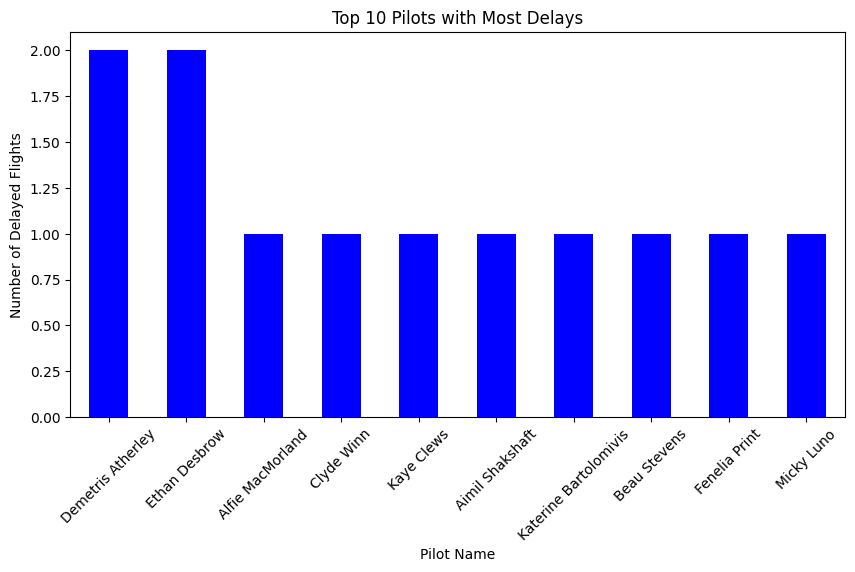

In [19]:
# (Who operates the most delayed flights?)
pilot_delays = df[df['Flight Status'] == 'Delayed']['Pilot Name'].value_counts().head(10)
print (pilot_delays)

# Plot
plt.figure(figsize=(10, 5))
pilot_delays.plot(kind='bar', color='blue')
plt.title("Top 10 Pilots with Most Delays")
plt.xlabel("Pilot Name")
plt.ylabel("Number of Delayed Flights")
plt.xticks(rotation=45)
plt.show()

## 10. Top 10 Busiest Flight Routes

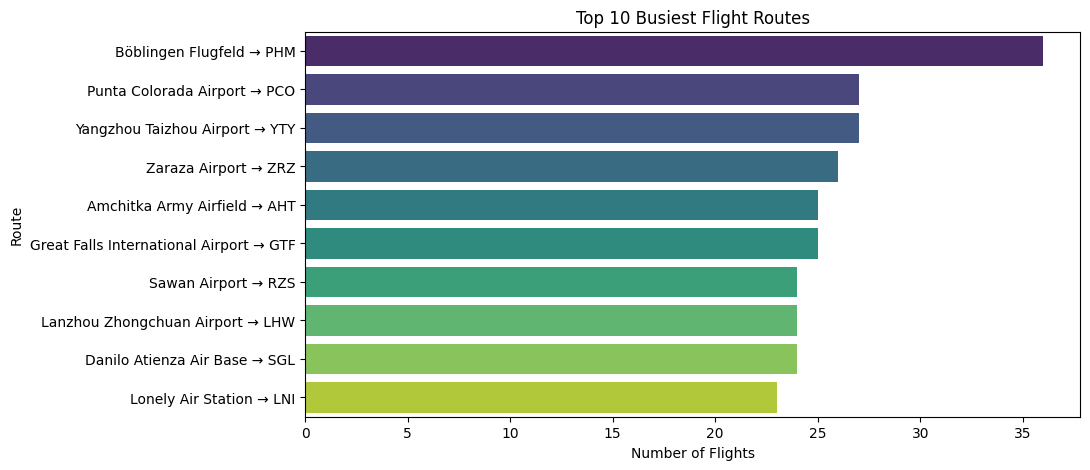

In [20]:
#  Busiest Flight Routes
flight_routes = df.groupby(['Airport Name', 'Arrival Airport']).size().reset_index(name='Flight Count')
top_routes = flight_routes.sort_values(by='Flight Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))

sns.barplot(
    x=top_routes['Flight Count'], 
    y=top_routes['Airport Name'] + " → " + top_routes['Arrival Airport'], 
    hue=top_routes['Airport Name'] + " → " + top_routes['Arrival Airport'], 
    palette="viridis", 
    legend=False
)

plt.title("Top 10 Busiest Flight Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


### 11. Top Nationalities of Travelers

Nationality
China            18317
Indonesia        10559
Russia            5693
Philippines       5239
Brazil            3791
Portugal          3299
Poland            3245
France            2907
Sweden            2397
United States     2105
Name: count, dtype: int64


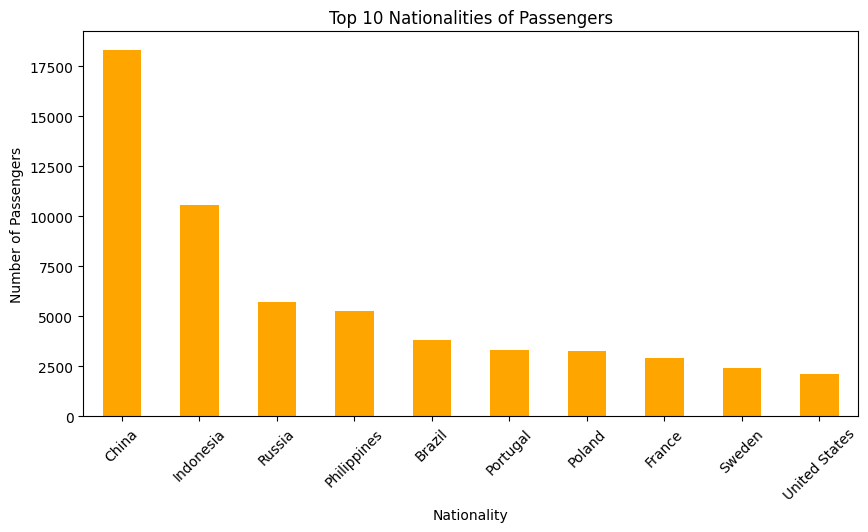

In [21]:
# Top Nationalities of Travelers
top_nationalities = df['Nationality'].value_counts().head(10)
print (top_nationalities)

# Plot
plt.figure(figsize=(10, 5))
top_nationalities.plot(kind='bar', color='orange')
plt.title("Top 10 Nationalities of Passengers")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.show()

### 12. Day of the Week Analysis (Which day has the most delays?)

Day of Week
Monday       2951
Sunday       2931
Wednesday    2880
Thursday     2858
Friday       2794
Tuesday      2790
Saturday     2670
Name: count, dtype: int64


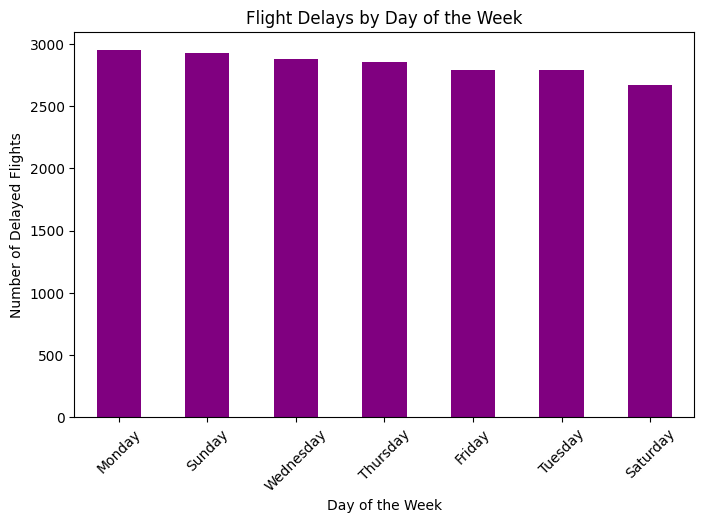

In [22]:
# Day of the Week Analysis
df['Day of Week'] = df['Departure Date'].dt.day_name()
daywise_delays = df[df['Flight Status'] == 'Delayed']['Day of Week'].value_counts()
print (daywise_delays)

# Plot
plt.figure(figsize=(8, 5))
daywise_delays.plot(kind='bar', color='purple')
plt.title("Flight Delays by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Delayed Flights")
plt.xticks(rotation=45)
plt.show()

## 13. Flight Delays by Day & Month

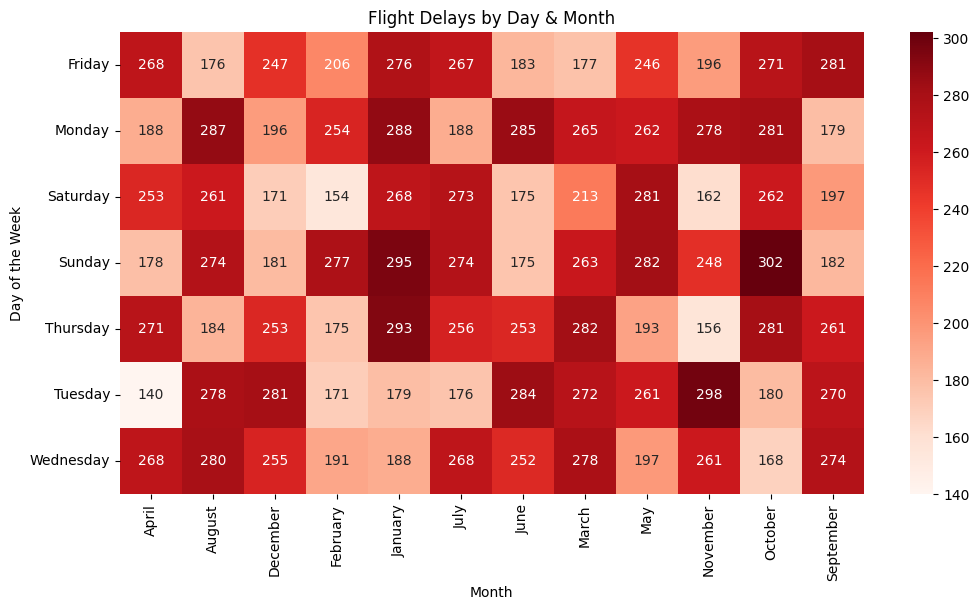

In [23]:
#  Heatmap for Delays by Day & Month
df["Day"] = df["Departure Date"].dt.day_name()
heatmap_data = df[df["Flight Status"] == "Delayed"].pivot_table(index="Day", columns="Month", aggfunc="size", fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt="d")
plt.title("Flight Delays by Day & Month")
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.show()

### 14.  Heatmap of Age and Flight Status

Text(0.5, 1.0, 'Age vs Flight Status Heatmap')

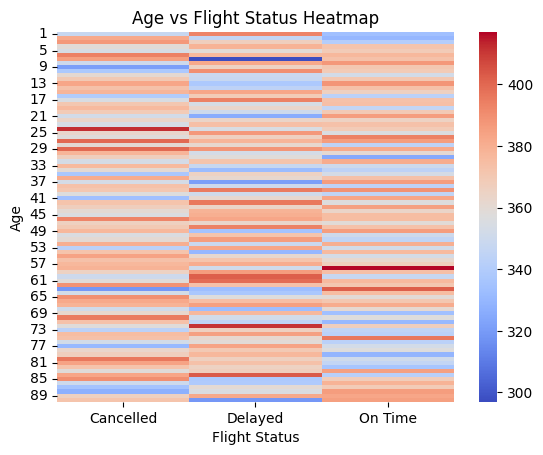

In [24]:

# plt.subplot(5, 3, 11)
sns.heatmap(pd.crosstab(df['Age'], df['Flight Status']), cmap='coolwarm', cbar=True)
plt.title("Age vs Flight Status Heatmap")
